In [34]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sqrt, sin, cos, pi

# Problem 4: *Comparing Methods of Integration*

Consider the function
$$
I = \int_0^1 dx \ \sin^2 \big(\sqrt{100x}\big)
$$

<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part A

Plot the integrand over the range of the integral.

</div>

In [35]:
def f(x):
    return sin(sqrt(100*x)) ** 2

In [36]:
start = 0
end = 1
n_subintervals = 1000

dx = (end - start) / n_subintervals
xs = np.arange(start, end, dx)

fs = f(xs)

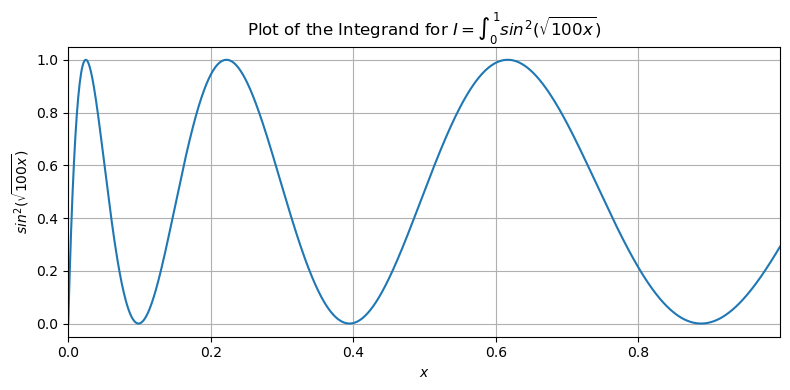

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(xs, fs)
plt.title("Plot of the Integrand for $I = \\int_0^1 sin^2(\\sqrt{100x})$")

plt.xlabel("$x$")
plt.ylabel("$sin^2(\\sqrt{100x})$")
plt.xlim(xs[0], xs[-1])
plt.grid()
plt.tight_layout()

<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part B

Write a program that uses the adaptive trapezoid rule to calculate the integral to an approximate accuracy of $\epsilon = 10^{-6}$, using the following procedure: Start with the trapezoid rule using a single subinterval. Double the number of subintervals and recalculate the integral. Continue to double the number of subintervals until the error is less than $10^{−6}$. Recall that the error is given by $$\epsilon_i = \frac{1}{3} (I_i - I_{i-1} )$$ where the number of subintervals $N_i$ used to calculate $I_i$ is twice that used to calculate $I_{i−1}$. To make your implementation more efficient, use the fact that $$I_i = \frac{1}{2} I_{i-1} + \Delta x_i \sum_k f(a + k\Delta x_i)$$ where $\Delta x_i$ is the width of the subinterval for the ith iteration, and $k$ runs over odd numbers from 1 to $N_i - 1$.

</div>

In [38]:
def error(I_prev, I_curr):
    return np.abs(1/3 * (I_curr - I_prev))

In [39]:
def integrate_adaptive_trapezoid(tolerance, max_iter):

    # Start with one subinterval
    n_subintervals = 1
    Is = [ 1/2 * (end - start) * (f(start) + f(end)) ]
    
    # First error doesn't count, just make it different
    errors = [-1]

    # Iterate a maximum number of times
    for i in range(1, max_iter+1):
        # Double number of intervals
        n_subintervals *= 2
        # Get interval size
        dx = (end - start) / n_subintervals
        
        # Calculate integral
        Is.append(1/2 * Is[i-1])
        for k in range(1, n_subintervals):
            if k % 2 != 0: # must be odd
                Is[i] += dx * f(start + k*dx)
        
        # Keep track of errors
        errors.append(error(Is[i-1], Is[i]))

        # If tolerance has been reached, break
        if errors[-1] < tolerance:
            print(f"error: {errors[-1]}")
            break
    
    # Return the integral that is within tolerance
    return Is[-1], errors[-1]

In [40]:
I, error_I = integrate_adaptive_trapezoid(tolerance=1e-6, max_iter=1000)
print(f"Integral of the function: {I}")

error: 4.7402554180046386e-07
Integral of the function: 0.4558320582782706


<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part C

Write a separate program that uses Romberg integration to solve the integral, also to an accuracy of $10^{−6}$ using the following procedure. First, calculate the integral with the trapezoid rule for one subinterval (as you did in part B); we will refer to this as step $i = 1$, and the result as $I_1 \equiv R_{1,1}$. Then, calculate $I_2 \equiv R_{2,1}$ using two subintervals. Using these two results, we can construct an improved estimate of the integral as:
$$
R_{2,2} = R_{2,1} + \frac{1}{3}(R_{2,1}-R_{1,1}).
$$

In general,
$$
R_{i,m+1} = R_{i,m} + \frac{1}{4^m-1}(R_{i,m}-R_{i-1,m}).
$$

Therefore, for each iteration $i$ (where we double the number of subintervals), we can obtain improved approximations up to $m = i−1$ with very minor extra work. For each $i$ and $m$, we can calculate the error at previous steps as
$$
\epsilon_{i,m} = \frac{1}{4^m-1}(R_{i,m}-R_{i-1,m}).
$$

Use these equations to iterate until the error in $R_{i,i}$ is less than $10^{−6}$. How significant is the improvement with respect to number of subintervals necessary compared to the approach of part B?

</div>

In [41]:
def integrate_trapezoid(n_subintervals):

    # Start with one subinterval
    dx = (end - start) / n_subintervals
    
    result = 0
    for k in range(n_subintervals):
        x = start + k*dx
        result += dx / 2 * (f(x) + f(x+dx))
    
    return result

In [42]:
np.set_printoptions(precision=2)

def integrate_romberg(tolerance, max_iter):
    i_max = m_max = max_iter
    
    R = np.full((i_max, m_max), 0.0)
    e = np.full((i_max, m_max), 1e8) # just a random large number to start
    
    errors = []
    
    # Assign first value
    R[1,1] = integrate_trapezoid(n_subintervals=1)
    
    for i in range(2, i_max+1): # 3 <= i < max_iter
        # m = 1 is different
        R[i, 1] = integrate_trapezoid(n_subintervals=2**(i-1))
        
        for m in range(1, i): # 1 <= m < i
            R[i,m+1] = R[i,m] + 1/(4**m-1) * (R[i,m]- R[i-1,m])
            e[i,m]   =   np.abs(1/(4**m-1) * (R[i,m]- R[i-1,m]))

        errors.append(e[i,i-1])
        
        if (errors[-1] < tolerance):
            return R[i,i], errors[-1]

    return -1

In [43]:
R, error_R = integrate_romberg(1e-6, 20)

In [44]:
print(f"""
The error is much better:
- Adaptive trapezoidal: {error_I:.2e}
- Romberg: {error_R:.2e}
""")


The error is much better:
- Adaptive trapezoidal: 4.74e-07
- Romberg: 1.34e-08



<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part D

Use the Gauss-Legendre approach to calculate the integral. What order (i.e., how many points) do you need to obtain an accuracy below $10^{−6}$? You can find tabulated weights and points online, e.g., https://pomax.github.io/bezierinfo/legendre-gauss.html.

</div>

In [49]:
def integrate_gl(f, a, b, x, w):    
    return (b-a)/2 * np.dot(w, f((b-a)/2 * x + (b+a)/2))

In [53]:
from numpy.polynomial.legendre import leggauss

tolerance = 1e-6
e = np.inf

x_ref, w_ref = leggauss(20) # high-accuracy reference
I_ref = integrate_gl(f, start, end, x_ref, w_ref)

n = 1 # number of points
while e > tolerance:
    x, w = leggauss(n)
    I = integrate_gl(f, start, end, x, w)
    e = np.abs((I_ref - I) / I_ref)
    
    n += 1
    
print(f"Converged at n = {n}")

Converged at n = 10
